In [1]:
from utils import load_cnf, cnf_to_bqm, get_ancilla_index

In [2]:
def load_file(folder = 'sat', _variables=140):
    path = f"./{folder}/sgen1-{folder}-{_variables}-100.cnf"
    num_variables, num_clauses, variables, clauses = load_cnf(path)
    return num_variables, num_clauses, variables, clauses

In [3]:
import random
def get_key_with_value(d, val):
    keys = []
    for (key, _) in d.items():
        if d[key] == val:
            keys.append(key)
    if len(keys) == 0:
        return -1
    else:
        return random.choice(keys)

def mirror_variable(variables, clauses) -> (int, int):
    # find variables that repeats the most
    counts = dict()
    for clause in clauses:
        for var in clause:
            abs_var = abs(var)
            if abs_var not in counts:
                counts[abs_var] = 0
            counts[abs_var] += 1
    
    max_count = max(counts.values())
    key = get_key_with_value(counts, max_count)
    assert(key != -1)
    assert(counts[key] == max_count)
    new_variable = len(variables) + 1 
    assert(new_variable not in variables)
    variables.add(new_variable)
    replacements = max_count//2
    if replacements == 0:
        return key, new_variable
    
    while replacements > 0:
        clauses_where_var_occur = []
        for (index, clause) in enumerate(clauses):
            for i in range(len(clause)):
                if abs(clause[i]) == key:
                    clauses_where_var_occur.append((index,i))
                    break
                
        (clause_index, i) = random.choice(clauses_where_var_occur)
        if clauses[clause_index][i] < 0:
            clauses[clause_index][i] = -new_variable
        else:
            clauses[clause_index][i] = new_variable
        replacements -= 1
    return key, new_variable

In [4]:
num_variables, num_clauses, variables, clauses = load_file()

In [5]:
random.seed(1)
num_variables_to_mirror = 1
variables_to_mirror = []
for i in range(num_variables_to_mirror):
    variables_to_mirror.append(mirror_variable(variables, clauses))

In [6]:
bqm, or_result_vars, clauses_qubits = cnf_to_bqm(variables, clauses)

In [7]:
len(bqm.variables)

309

In [8]:
def update_bqm_mirror_variable(original, mirror):
    global bqm
    bqm.add_variable(original, 2)
    bqm.add_variable(mirror, 2)
    bqm.add_interaction(original, mirror, -4)

In [9]:
for vtm in variables_to_mirror:
    update_bqm_mirror_variable(vtm[0], vtm[1])

In [10]:
from minorminer import find_embedding
from dwave.system import DWaveSampler, FixedEmbeddingComposite
qpu_pegasus = DWaveSampler(solver={'topology__type': 'pegasus'})

<AxesSubplot:ylabel='Count'>

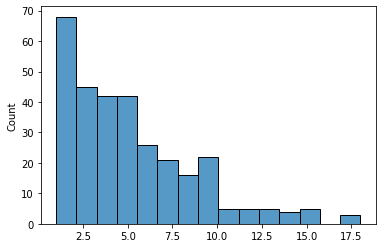

In [11]:
embedding = find_embedding(bqm.quadratic.keys(), qpu_pegasus.edgelist, random_seed=1)

def get_chain_lengths(_embedding):
    lengths = []
    biases = []
    for (key, value) in _embedding.items():
        lengths.append(len(value))
        biases.append(bqm.linear[key])
    return lengths, biases

import seaborn as sns
sns.histplot(get_chain_lengths(embedding)[0])

In [13]:
def count_qubits_used(embedding):
    physical_vars = set()
    for (logic_var, chain) in embedding.items():
        for pv in chain:
            physical_vars.add(pv)
        
    return len(physical_vars)
count_qubits_used(embedding)

1627

-----------------------

In [14]:
num_variables_to_mirror = 1
mirrored_variables = []
total_used_qubits = []
for num_variables_to_mirror in range(141):
    random.seed(1)
    num_variables, num_clauses, variables, clauses = load_file()
    variables_to_mirror = []
    for i in range(num_variables_to_mirror):
        variables_to_mirror.append(mirror_variable(variables, clauses))
    bqm, or_result_vars, clauses_qubits = cnf_to_bqm(variables, clauses)
    assert(len(bqm.variables) == 308 + num_variables_to_mirror)
    for vtm in variables_to_mirror:
        update_bqm_mirror_variable(vtm[0], vtm[1])
    embedding = find_embedding(bqm.quadratic.keys(), qpu_pegasus.edgelist, random_seed=1238)
    mirrored_variables.append(num_variables_to_mirror)
    total_used_qubits.append(count_qubits_used(embedding))
    print(num_variables_to_mirror, count_qubits_used(embedding))

0 1465
1 1374
2 1594
3 1427
4 1487
5 1332
6 1730
7 1456
8 1490
9 1415
10 1458
11 1633
12 1671
13 1538
14 1541
15 1457
16 1453
17 1442
18 1512
19 1388
20 1358
21 1503
22 1613
23 1598
24 1557
25 1578
26 1501
27 1611
28 1488
29 1604
30 1508
31 1553
32 1546
33 1507
34 1554
35 1623
36 1542
37 1536
38 1690
39 1448
40 1587
41 1653
42 1487
43 1484
44 1455
45 1592
46 1492
47 1568
48 1471
49 1660
50 1600
51 1568
52 1743
53 1563
54 1669
55 1535
56 1615
57 1560
58 1504
59 1499
60 1711
61 1632
62 1578
63 1616
64 1628
65 1678
66 1550
67 1505
68 1642
69 2061
70 1717
71 1642
72 1740
73 1644
74 1575
75 1734
76 1649
77 1562
78 1818
79 1720
80 1484
81 1669
82 1644
83 1566
84 1780
85 1725
86 1663
87 1757
88 1703
89 1641
90 1615
91 1629
92 1748
93 1726
94 1838
95 1840
96 1957
97 1755
98 1628
99 1672
100 1654
101 1770
102 1692
103 1732
104 1804
105 1662
106 1735
107 1654
108 1820
109 1828
110 1601
111 1697
112 1837
113 1779
114 1782
115 1652
116 1809
117 2004
118 1892
119 1887
120 1808
121 1939
122 2021
123